<h1>Scikit Learn Intro</h1>

<h5>Data Standardization</h5>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[["age", "fare", "pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [55]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [56]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [57]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

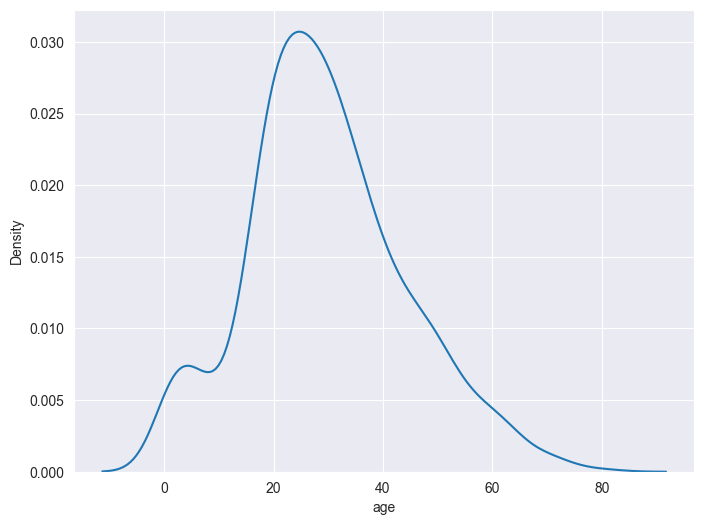

In [58]:
sns.kdeplot(titanic_data['age'])

<h5>Min and Max</h5>

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<Axes: xlabel='age', ylabel='Density'>

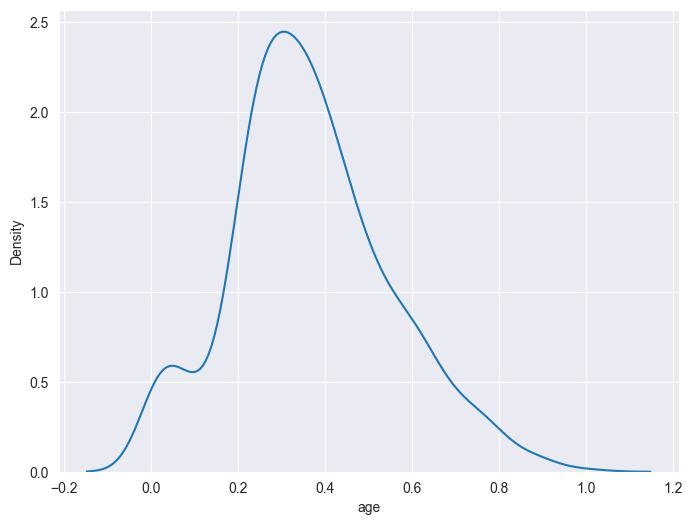

In [60]:
sns.kdeplot(titanic_data_scaled['age'])

<h5>Mean Normalization</h5>

In [61]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

<h5>Range of values</h5>

In [62]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

<h5>Mean Normalization</h5>

In [63]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals

<Axes: xlabel='age', ylabel='Density'>

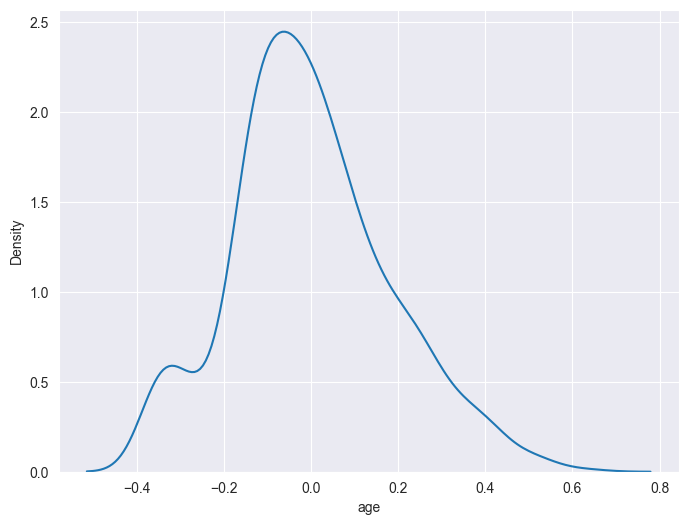

In [64]:
sns.kdeplot(titanic_data_scaled['age'])

<h5>Mean Or Median Imputation</h5>

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [67]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age'] = np.round(titanic_data['Mean_Age'], 1)

titanic_data.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Median_Age,Mean_Age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,28.0,29.7
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.0,2.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0,14.0


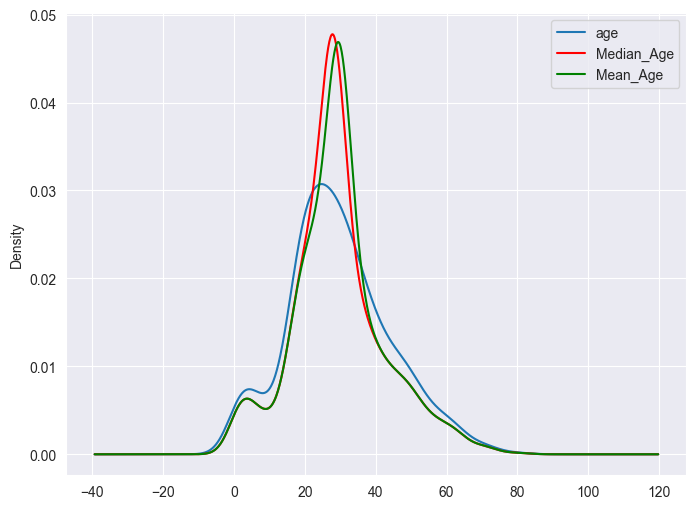

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)

titanic_data['Median_Age'].plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<h5>End of Distribution Imputation</h5>

In [69]:
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset("titanic")

titanic_data = titanic_data[['survived', 'pclass', 'age', 'fare']]

titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

<Axes: >

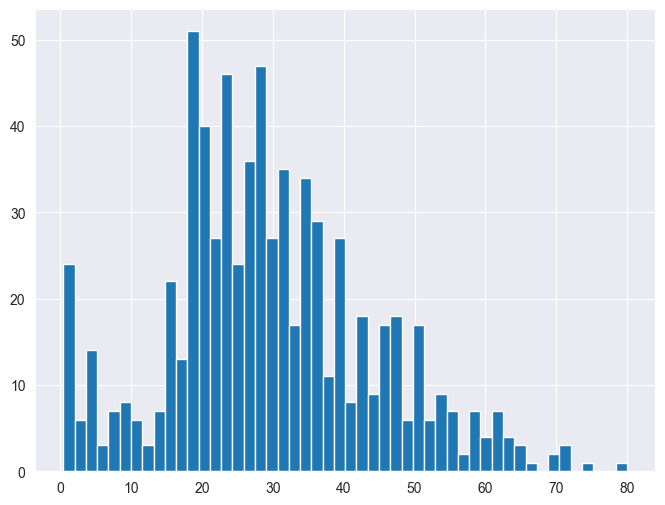

In [70]:
titanic_data.age.hist(bins=50)

In [71]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406094


In [72]:
import numpy as np

titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


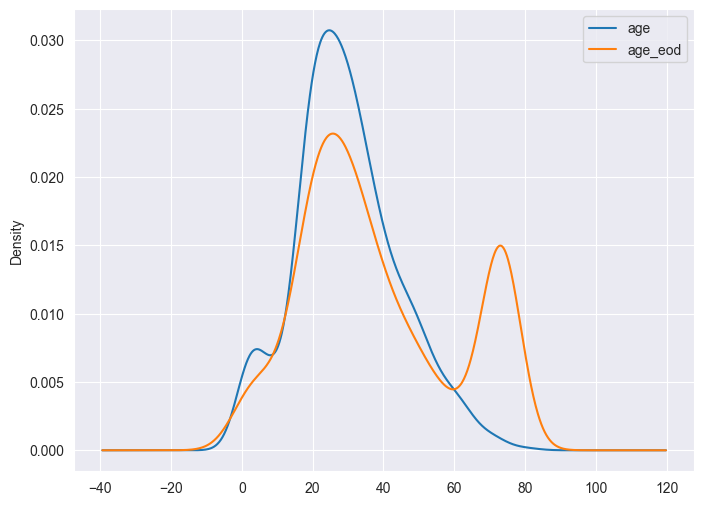

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)
titanic_data['age_eod'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<h5>Frequent Category Imputation</h5>

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[['embark_town', 'age', 'fare']]

titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'No Of Passengers')

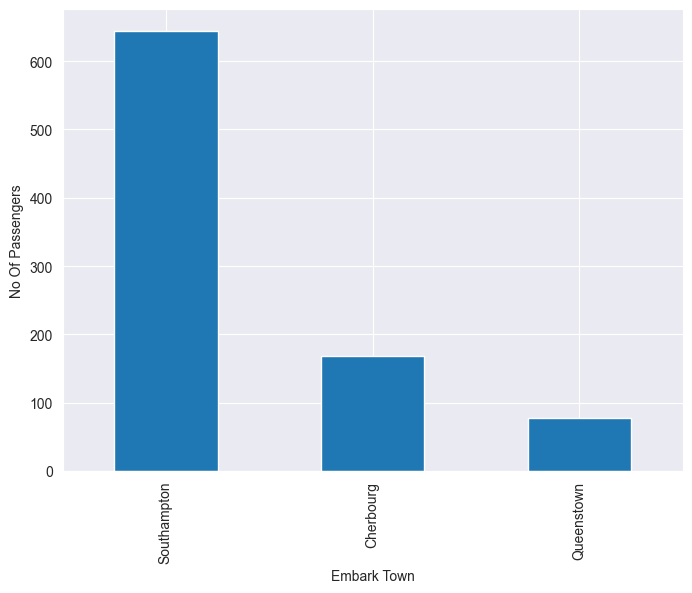

In [75]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('No Of Passengers')

In [76]:
titanic_data.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [77]:
titanic_data.embark_town.fillna('Southampton', inplace=True)

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_5336\2073162354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data.embark_town.fillna('Southampton', inplace=True)


In [78]:
titanic_data.age.mode()

0    24.0
Name: age, dtype: float64

In [79]:
import numpy as np

titanic_data['age_mode'] = titanic_data.age.fillna(24)
titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


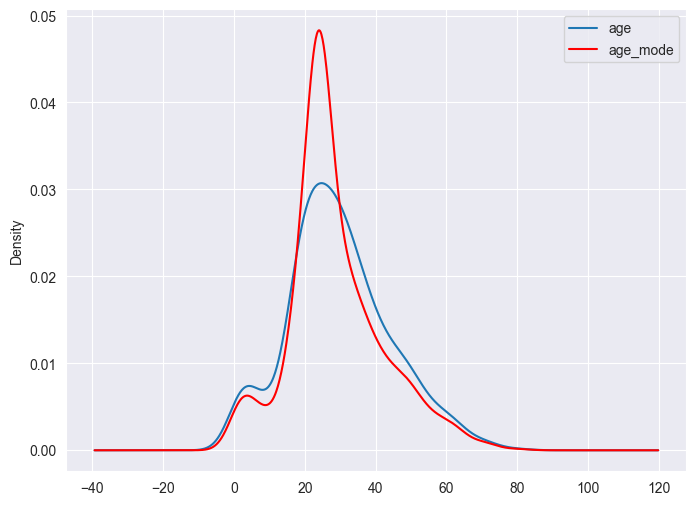

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'].plot(kind='kde', ax=ax)

titanic_data['age_mode'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

<h5>Missing Category Imputation</h5>

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [82]:
titanic_data.embark_town.fillna('Missing', inplace= True)

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_5336\1079947629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data.embark_town.fillna('Missing', inplace= True)


Text(0, 0.5, 'No Of Passengers')

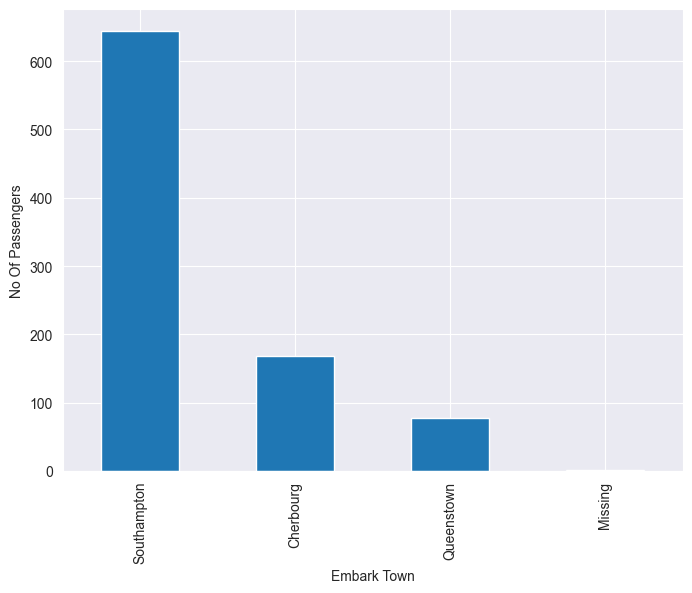

In [83]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('No Of Passengers')

<h4>Categorical Data Encoding</h4>

<h5>One Hot Encoding</h5>

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
titanic_data = titanic_data[['sex', 'class', 'embark_town']]
titanic_data.head(20)

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton
5,male,Third,Queenstown
6,male,First,Southampton
7,male,Third,Southampton
8,female,Third,Southampton
9,female,Second,Cherbourg


In [86]:
print(titanic_data['sex'].unique())
print(titanic_data['class'].unique())
print(titanic_data['embark_town'].unique())

['male' 'female']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [87]:
import pandas as pd

temp = pd.get_dummies(titanic_data['sex'])

temp.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [88]:
pd.concat([titanic_data['sex'], pd.get_dummies(titanic_data['sex'])], axis=1).head()

,sex,female,male
0,male,False,True
1,female,True,False
2,female,True,False
3,female,True,False
4,male,False,True


In [89]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'])

temp.head()

,Cherbourg,Queenstown,Southampton
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [90]:
import pandas as pd

temp = pd.get_dummies(titanic_data['embark_town'], drop_first=True)
temp.head()

,Queenstown,Southampton
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [91]:
temp = pd.get_dummies(titanic_data['embark_town'], dummy_na=True, drop_first=True)
temp.head()

,Queenstown,Southampton,NaN
0,False,True,False
1,False,False,False
2,False,True,False
3,False,True,False
4,False,True,False


<h5>Label Encoding</h5>

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(titanic_data['class'])

titanic_data['le_class'] = le.transform(titanic_data['class'])

titanic_data.head()

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


<h4>Data Discretization(The process of converting continuous numeric values into discrete numeric values)</h4>

<h5>Equal Width Discretization</h5>

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\JohnWork\AppData\Local\Temp\ipykernel_5336\3024078.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data['price'])


<Axes: xlabel='price', ylabel='Density'>

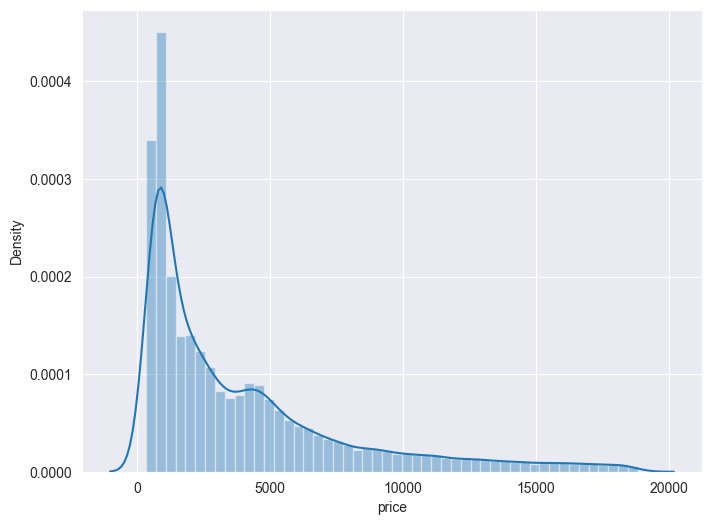

In [94]:
sns.distplot(diamond_data['price'])

<Axes: xlabel='price', ylabel='Count'>

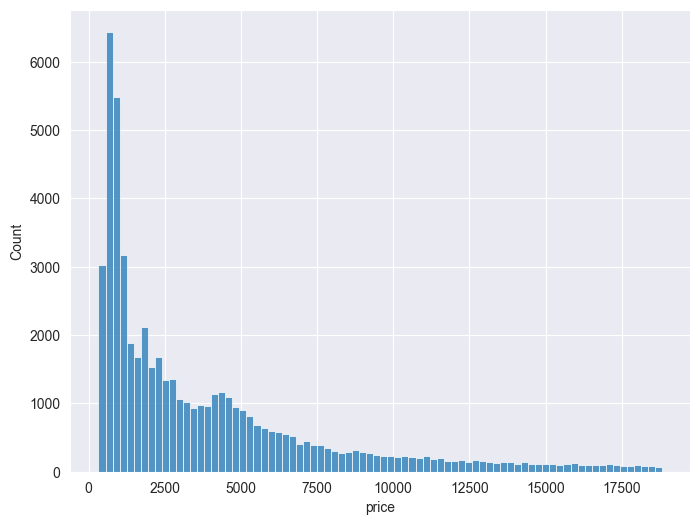

In [95]:
sns.histplot(diamond_data['price'])


In [96]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range)

18497


In [97]:
price_range / 10

1849.7

In [98]:
lower_interval = int(np.floor(diamond_data['price'].min()))
upper_interval = int(np.ceil(diamond_data['price'].max()))

interval_length = int(np.round(price_range / 10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [99]:
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [100]:
bin_labels = ['Bin_no_'+str(i) for i in range(1, len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [101]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=total_bins, labels=bin_labels, include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


C:\Users\JohnWork\AppData\Local\Temp\ipykernel_5336\1348242212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamond_data.groupby('price_bins')['price'].count().plot.bar()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

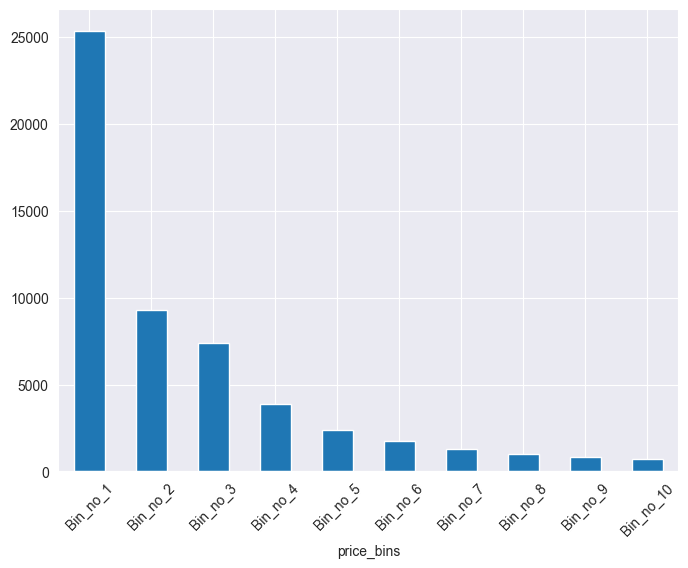

In [102]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

<h5>Equal Frequency Discretization</h5>

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')

diamond_data = sns.load_dataset('diamonds')

diamond_data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [104]:
discretized_price, bins = pd.qcut(diamond_data['price'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretized_price, diamond_data['price']], axis=1).head(20)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [105]:
print(bins)
print(type(bins))

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]
<class 'numpy.ndarray'>


In [106]:
discretized_price.value_counts()

price
(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: count, dtype: int64

In [107]:
bin_labels = ['Bin_no_'+str(i) for i in range(1, 11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [108]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, labels=bin_labels, include_lowest=True)
diamond_data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


C:\Users\JohnWork\AppData\Local\Temp\ipykernel_5336\1348242212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamond_data.groupby('price_bins')['price'].count().plot.bar()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

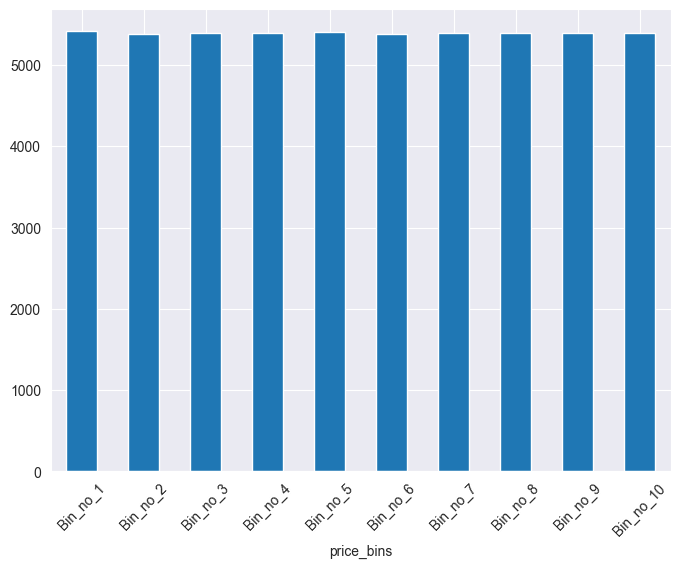

In [109]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

<h4>Handling Outliers</h4>

<h5>Outlier Trimming</h5>

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

titanic_data.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<Axes: ylabel='age'>

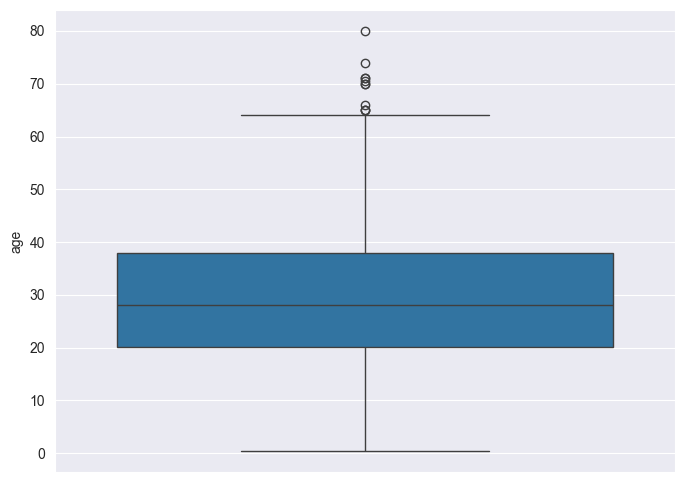

In [111]:
sns.boxplot(y='age', data=titanic_data)

<p>A simple script to find the age outliers of the data</p>

In [112]:
IQR = titanic_data['age'].quantile(0.75) - titanic_data['age'].quantile(0.25)

lower_age_limit = titanic_data['age'].quantile(0.25) - (IQR * 1.5)
upper_age_limit = titanic_data['age'].quantile(0.75) + (IQR * 1.5)

print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


<p>A script that finds the rows with the outlier values</p>

In [113]:
age_outliers = np.where(titanic_data['age'] > upper_age_limit, True, np.where(titanic_data['age'] < lower_age_limit, True, False))

<p>The following script removed rows contains the outlier values</p>

In [114]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers), ]

titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

<p>A box plot of the titanic data without the outliers</p>

<Axes: ylabel='age'>

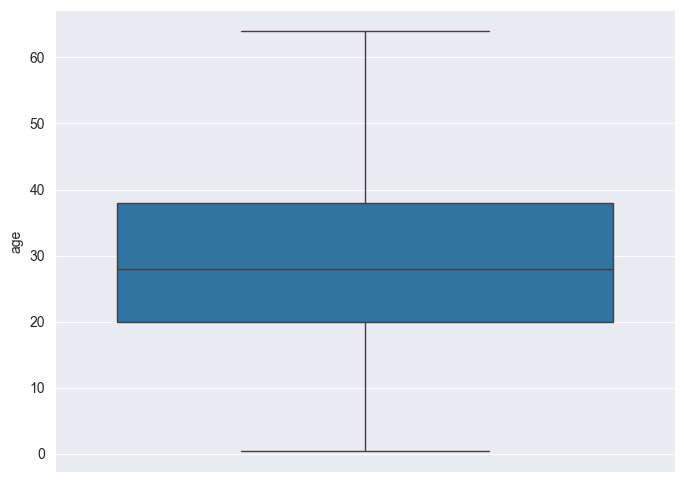

In [115]:
sns.boxplot(y='age', data=titanic_without_age_outliers)

<h5>Outlier Capping Using Mean and STD</h5>

<Axes: ylabel='age'>

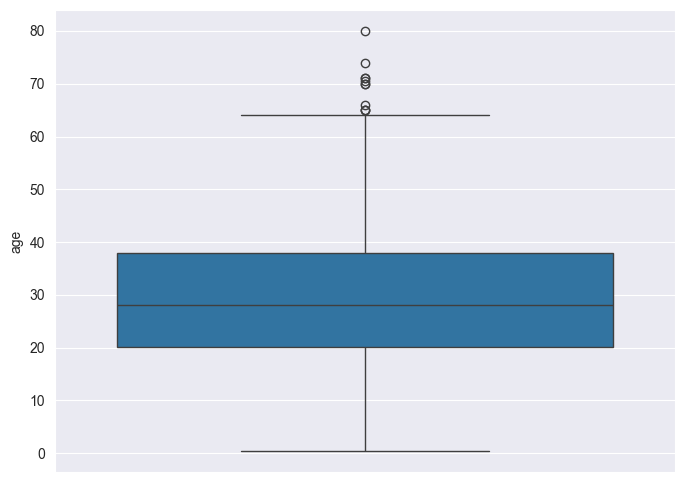

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

sns.boxplot(y='age', data=titanic_data)

<p>A script that finds the upper and lower threshold using mean and standard deviation capping</p>

In [117]:
lower_age_limit = titanic_data['age'].mean() - (3 * titanic_data['age'].std())
upper_age_limit = titanic_data['age'].mean() + (3 * titanic_data['age'].std())

print(lower_age_limit)
print(upper_age_limit)

-13.880374349943303
73.27860964406094


<p>A script that replaces the outlier values with the upper and lower limits</p>

In [118]:
titanic_data['age'] = np.where(titanic_data['age'] > upper_age_limit, upper_age_limit, np.where(titanic_data['age'] < lower_age_limit, lower_age_limit, titanic_data['age']))

<Axes: ylabel='age'>

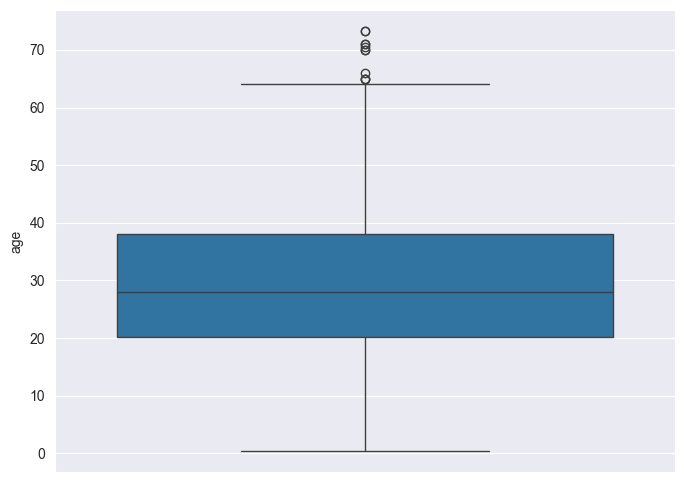

In [119]:
sns.boxplot(y='age', data=titanic_data)

<h3>Feature Selection with Scikit Learn</h3>

<h5>Feature Selection Based on Variance</h5>

In [122]:
import pandas as pd
import numpy as np

wine_data = pd.read_csv('./data_sets/winequality-red.csv')
wine_data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [123]:
features = wine_data.drop(['quality'], axis=1)
labels = wine_data.filter(['quality'], axis=1)

KeyError: "['quality'] not found in axis"

In [124]:
features.var()

NameError: name 'features' is not defined

In [125]:
from sklearn.feature_selection import VarianceThreshold

var_sel = VarianceThreshold(threshold=0.1)
var_sel.fit(features)

NameError: name 'features' is not defined

In [126]:
attributes_to_retain = features.columns[var_sel.get_support()]
attributes_to_retain

NameError: name 'features' is not defined

In [127]:
attributes_to_filter = [attr for attr in features.columns if attr not in features.columns[var_sel.get_support()]]
attributes_to_filter

NameError: name 'features' is not defined

In [128]:
filtered_dataset = features.drop(attributes_to_filter, axis = 1)
filtered_dataset.head()

NameError: name 'features' is not defined

<h4>Feature Selection Based on Correlation</h4>

In [129]:
correlation_matrix = features.corr()
correlation_matrix

NameError: name 'features' is not defined

In [130]:
import seaborn as sns
sns.heatmap(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

In [131]:
# Creating a correlation matrix for features

correlated_features_matrix = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            corr_col = correlation_matrix.columns[i]
            correlated_features_matrix.add(corr_col)

NameError: name 'correlation_matrix' is not defined

<h4>Feature Selection Based on Recursive Elimination</h4>

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=4, step=1)
rfe.fit(features, labels)

NameError: name 'features' is not defined

In [134]:
rfe.ranking_

AttributeError: 'RFE' object has no attribute 'ranking_'

In [135]:
attributes_to_retain = rfe.get_support(1)
attributes_to_retain

NotFittedError: This RFE instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<h4>Feature Selection Based on Model Performance</h4>

In [136]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor()
rfr.fit(features, labels)

NameError: name 'features' is not defined

<h3>Solving Regression Problems in Machine Learning using Sklearn</h3>

<h4>Preparing Data for Regression Problems</h4>

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [138]:
tips_df = sns.load_dataset("tips")
tips_df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [140]:
diamond_df = sns.load_dataset('diamonds')
diamond_df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


<h5>Dividing Data into Features and Labels</h5>

In [143]:
# Extracting Features
x = tips_df.drop(['tip'], axis=1)

# Extracting Labels
y = tips_df['tip']

x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [144]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

<h5>Converting Categorical Data to Numbers</h5>

In [146]:
# Removing categorical features
numerical = x.drop(['sex', 'smoker', 'day', 'time'], axis=1)

In [147]:
numerical.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [148]:
# Filtering categorical features
categorical = x.filter(['sex', 'smoker', 'day', 'time'])

# Printing Categorical features header
categorical.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [149]:
import pandas as pd

cat_numerical = pd.get_dummies(categorical, drop_first=True)
cat_numerical.head()

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,True,True,False,False,True,True
1,False,True,False,False,True,True
2,False,True,False,False,True,True
3,False,True,False,False,True,True
4,True,True,False,False,True,True


In [150]:
# Concatenating numerical and one hot encoded features
x = pd.concat([numerical, cat_numerical], axis=1)
x.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,True,True,False,False,True,True
1,10.34,3,False,True,False,False,True,True
2,21.01,3,False,True,False,False,True,True
3,23.68,2,False,True,False,False,True,True
4,24.59,4,True,True,False,False,True,True


<h5>Divide Data into Training and Test Sets</h5>

In [151]:
# Dividing data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [153]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_test

array([[-0.04546101, -0.61214068, -0.73173292,  0.79056942, -0.30903983,
         1.33630621, -0.67470281,  0.61093325],
       [-1.30860871, -0.61214068, -0.73173292,  0.79056942, -0.30903983,
        -0.74833148,  1.48213404,  0.61093325],
       [ 0.4952348 ,  1.51942062, -0.73173292,  0.79056942, -0.30903983,
        -0.74833148,  1.48213404,  0.61093325],
       [ 0.64841289,  1.51942062, -0.73173292, -1.26491106, -0.30903983,
         1.33630621, -0.67470281,  0.61093325],
       [-0.82506891, -0.61214068,  1.36661884, -1.26491106, -0.30903983,
        -0.74833148, -0.67470281, -1.63684003],
       [-0.26608319, -0.61214068, -0.73173292, -1.26491106, -0.30903983,
        -0.74833148,  1.48213404,  0.61093325],
       [ 0.93990852, -0.61214068, -0.73173292, -1.26491106, -0.30903983,
        -0.74833148, -0.67470281, -1.63684003],
       [-0.88451116, -0.61214068,  1.36661884,  0.79056942, -0.30903983,
        -0.74833148, -0.67470281, -1.63684003],
       [-0.62159354, -0.61214068

<h4>Single Output Regression Problems</h4>

<h5>Linear Regression</h5>

In [154]:
# Importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Training the model
regressor = lin_reg.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

<h4>Mean Error Shenanigans</h4>

In [155]:
# Evaluating model performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6671331480264893
Mean Squared Error 0.7033566017436103
Root Mean Squared Error 0.8386635807900629


<h5>KNN Regression</h5>

In [156]:
# Importing the KNN model for SKLearn
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

# Training the model
regressor = knn_reg.fit(x_train, y_train)

# Making Predictions
y_pred = regressor.predict(x_test)

# Evaluating model performance
from sklearn import metrics
import numpy as np


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7654693877551021
Mean Squared Error: 0.9146855510204083
Root Mean Squared Error: 0.9563919442469224


<h5>Random Forest Regression</h5>

In [157]:
# Importing the random forest algorithm from SKlearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

# Training the model
regressor = rf_reg.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model performance
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7427432653061211
Mean Squared Error: 0.8857243681387723
Root Mean Squared Error: 0.9411293046860099


<h5>Making Predictions on a single record</h5>

In [158]:
tips_df.loc[100]

total_bill     11.35
tip              2.5
sex           Female
smoker           Yes
day              Fri
time          Dinner
size               2
Name: 100, dtype: object

In [159]:
# Importing random forest regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, random_state=42)

# Training the algorithm on training set
regressor = rf_reg.fit(x_train, y_train)

# Making predictions on the 101st record on the the dataset
single_record = sc.transform(x.values[100].reshape(1, -1))
predicted_tip = regressor.predict(single_record)

# Printing the predicted value
print(predicted_tip)

[8.50474]


<h4>Multi-output Regression Problems</h4>

In [160]:
# Example of a multi-output regression problem
from sklearn.datasets import make_regression

# Create a dummy dataset
x, y = make_regression(n_samples=2000, n_features=8, n_informative=4, n_targets=3, random_state=42, noise=0.3)

# Print Dataset shape
print(x.shape, y.shape)

(2000, 8) (2000, 3)


In [161]:
# Dividing data into training and test data sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Feature scaling using the standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h5>Linear Regression for Multi Output Regression</h5>

In [162]:
# importing the linear regression model from sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Training the model
regressor = lin_reg.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model performance
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24400622004095665
Mean Squared Error: 0.09288200051053586
Root Mean Squared Error: 0.30476548444752705


In [163]:
# Making predictions on the 51st record from the test set
single_record = sc.transform(x_test[50].reshape(1, -1))
predicted_val = regressor.predict(single_record)

# Printing the predicted value
print(predicted_val)

# Printing the actual value
print(y_test[50])

[[ 52.14499321 154.07153888  29.65411176]]
[ 50.3331556  155.43458476  26.52621361]


<h4>Direct Multi Output Regression with Wrapper Algorithms</h4>

In [164]:
# Importing Multi Output Regressor and LinearSVR from the sklearn library
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

svr_reg = LinearSVR()

# Define the direct multi output wrapper model
wrap_clf = MultiOutputRegressor(svr_reg)

# Training the model
regressor = wrap_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model performance
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.24614401912280645
Mean Squared Error: 0.09440727419698515
Root Mean Squared Error: 0.30725766743400423


c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [165]:
# Making predictions on the 51st Record from the test set
single_record = sc.transform(x_test[50].reshape(1, -1))
predicted_val = regressor.predict(single_record)

# Print the predicting value
print(predicted_val)

# Printing the actual value
print(y_test[50])

[[ 52.10182638 154.04331613  29.65975427]]
[ 50.3331556  155.43458476  26.52621361]


<h3>Chained Multi Output Regression with Wrapper Algorithms</h3>

In [166]:
# importing multi-output Regressor and LinearSVR from the SKlearn library
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR


svr_reg = LinearSVR()

# Define the direct multi-output wrapper model
wrap_clf = RegressorChain(svr_reg, order=[0, 1, 2])

# Training the model
regressor = wrap_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)


# Evaluating the model's performance
from sklearn import metrics
import numpy as np

print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

0.3823708487397222
0.24303984039875237
0.4929907102560376


c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [167]:
# Making predictions on the 51st record from the test set
single_record = sc.transform(x_test[50].reshape(1, -1))
predicted_val = regressor.predict(single_record)

# Printing the predicted value
print(predicted_val)

# Printing the actual value
print(y_test[50])

[[ 52.1179663  153.75129862  29.18678669]]
[ 50.3331556  155.43458476  26.52621361]


<h3>Solving Classification Problems in Machine Learning using SkLearn</h3>

<h4>Preparing Data for Classification Problems</h4>

In [168]:
import seaborn as sns
import pandas as pd
import numpy as np

churn_df = pd.read_csv('./data_sets/customer_churn.csv')
churn_df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [169]:
churn_df = churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_df.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [170]:
# Creating the feature set
x = churn_df.drop(['Exited'], axis=1)

# Creating the label set
y= churn_df['Exited']

In [171]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [172]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

<h5>Converting Categorical Data Into Numbers</h5>

In [173]:
# Dropping categorical columns
numerical = x.drop(['Geography', 'Gender'], axis=1)
numerical.head(50)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
5,645,44,8,113755.78,2,1,0,149756.71
6,822,50,7,0.00,2,1,1,10062.80
7,376,29,4,115046.74,4,1,0,119346.88
8,501,44,4,142051.07,2,0,1,74940.50
9,684,27,2,134603.88,1,1,1,71725.73


In [174]:
# Filtering categorical columns
categorical = x.filter(['Geography', 'Gender'])
categorical.head(50)

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
5,Spain,Male
6,France,Male
7,Germany,Female
8,France,Male
9,France,Male


In [175]:
# Converting categorical columns to one hot encoded columns
import pandas as pd

cat_numerical = pd.get_dummies(categorical, drop_first=True)
cat_numerical.head(50)

,Geography_Germany,Geography_Spain,Gender_Male
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False
5,False,True,True
6,False,False,True
7,True,False,False
8,False,False,True
9,False,False,True


In [177]:
# Concatenating numerical columns with one-hot encoded columns
x = pd.concat([numerical, cat_numerical], axis=1)
x.head(50)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,False,True,True
6,822,50,7,0.00,2,1,1,10062.80,False,False,True
7,376,29,4,115046.74,4,1,0,119346.88,True,False,False
8,501,44,4,142051.07,2,0,1,74940.50,False,False,True
9,684,27,2,134603.88,1,1,1,71725.73,False,False,True


<h5>Divide Data into Training and Test Sets</h5>

In [178]:
# Dividing data into the training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<h5>Data Scaling / Normalization</h5>

In [179]:
# Applying standard scaling to the dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h4>Solving Binary Classification Problems</h4>

<h5>Logistic Regression</h5>

In [180]:
# Importing logistic regression classifier from sklearn
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

# Training the logistic regression classifier
classifier = log_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

In [181]:
# Evaluating the algorithm on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1526   69]
 [ 309   96]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.811


<h5>KNN Classifier</h5>

In [182]:
# Importing the KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Training the KNN Classifier
classifier = knn_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on a test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1486  109]
 [ 237  168]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000

0.827


<h5>Random Forest Classifier</h5>

In [184]:
# Importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

# Training the random forest classifier
classifier = rf_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1521   74]
 [ 196  209]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.86      2000

0.865


<h5>K-Fold Cross Validation</h5>

In [185]:
# importing cross validation model from sklearn
from sklearn.model_selection import cross_val_score

# Applying 5 fold cross validation
print(cross_val_score(classifier, x, y, cv=5, scoring='accuracy'))

[0.864  0.8725 0.8625 0.863  0.8625]


<h5>Predicting a Single Value</h5>

In [186]:
churn_df.loc[100]

CreditScore              665
Geography             France
Gender                Female
Age                       40
Tenure                     6
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    161848.03
Exited                     0
Name: 100, dtype: object

In [187]:
# Importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

# Training  the algorithm on the training set
classifier = rf_clf.fit(x_train, y_train)

# Scaling a single record
single_record = sc.transform(x.values[100].reshape(1, -1))

# Making predictions on the 101st record from the dataset
predicted_churn = classifier.predict(single_record)
print(predicted_churn)

[0]


c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h4>Solving MultiClass Classification Problems</h4>

In [188]:
# Example of multi class classification problem
from sklearn.datasets import make_classification

# Create dummy dataset
x, y = make_classification(n_samples=2000, n_features=12, n_informative=8, n_redundant=4, n_classes=4, random_state=42)

# Print dataset shape
print(x.shape, y.shape)

(2000, 12) (2000,)


In [189]:
np.unique(y)

array([0, 1, 2, 3])

In [190]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [191]:
# Importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

# Training the random forest classifier
classifier = rf_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[74  7  6  4]
 [ 5 92  8  4]
 [ 5  7 82 14]
 [11  3  6 72]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        91
           1       0.84      0.84      0.84       109
           2       0.80      0.76      0.78       108
           3       0.77      0.78      0.77        92

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400

0.8


<h5>One vs One fo Multi class Classification</h5>

In [192]:
# Import one vs one and logistic regression model from sklearn
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

# Define the OVR strategy
clf = OneVsOneClassifier(log_clf)

# Training the logistic regression classifier
classifier = clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[59  8 15  9]
 [ 8 75 10 16]
 [ 6 23 54 25]
 [ 9  8 10 65]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        91
           1       0.66      0.69      0.67       109
           2       0.61      0.50      0.55       108
           3       0.57      0.71      0.63        92

    accuracy                           0.63       400
   macro avg       0.64      0.64      0.63       400
weighted avg       0.64      0.63      0.63       400

0.6325


<h4>Solving Multilevel Classification Problems</h4>

In [3]:
# Example of multiclass classification problem
from sklearn.datasets import make_multilabel_classification

# Create dummy dataset
x, y = make_multilabel_classification(n_samples=2000, n_features=10, n_classes=5, n_labels=3, random_state=42)

# Print dataset shape
print(x.shape, y.shape)

(2000, 10) (2000, 5)


In [4]:
y[200]

array([0, 1, 0, 1, 1])

In [5]:
# Dividing data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature scaling using standard scalar
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
y_test = sc.transform(x_test)

In [6]:
# Importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

# Training the random forest classifier
classifier = rf_clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

In [7]:
# Import one vs rest and logistic regression model from sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression()

# Define the ovr strategy
clf = OneVsRestClassifier(log_clf)

# Training the logistic regression classifier
classifier = clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = classifier.predict(x_test)

# Evaluating the algorithm on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

<h3>Clustering Data with Scikit Learn</h3>

<h4>K-Means Clustering</h4>

<h5>Clustering Dummy Data with K-Means Clustering</h5>

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_19364\2200177545.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


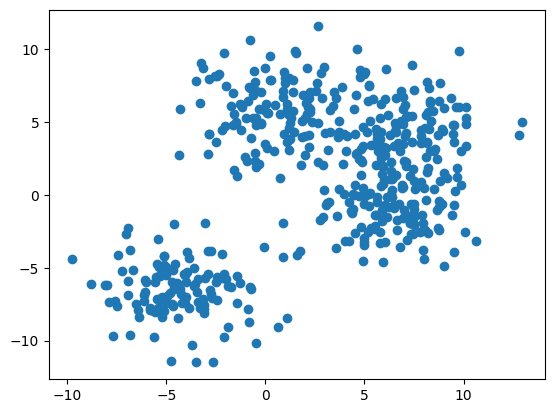

In [11]:
# Generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std=2.00)

# Plotting the dummy data
plt.scatter(features[:, 0], features[:, 1])

In [13]:
# Performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(features)

KMeans(n_clusters=4)

In [14]:
# Printing centroid values
print(km_model.cluster_centers_)

[[ 6.32266625 -1.13702147]
 [-4.33868691 -6.52097938]
 [ 0.30136943  5.73525559]
 [ 6.93382339  4.6167712 ]]


In [15]:
# Printing the predicted label values
print(km_model.labels_)

[3 2 1 3 3 3 3 3 0 0 0 0 0 2 2 3 3 1 1 3 0 2 3 2 1 1 3 3 1 2 2 3 1 0 3 2 3
 2 1 2 1 2 3 3 2 1 3 2 2 2 3 1 1 0 1 0 0 3 1 1 2 3 0 1 2 0 2 1 1 2 1 2 1 2
 0 1 1 0 2 1 0 0 0 2 1 2 0 2 1 2 1 2 3 0 0 1 3 1 3 2 0 0 1 3 3 0 3 2 2 1 2
 2 2 0 0 0 1 2 3 0 2 3 2 1 0 2 0 3 2 1 3 0 3 2 2 0 3 2 1 3 1 2 2 0 1 0 2 0
 2 0 0 0 1 3 0 1 2 0 2 1 1 1 3 0 1 1 3 1 3 3 1 1 2 3 1 1 0 0 3 0 0 0 0 2 1
 2 0 2 1 3 2 1 1 2 2 3 2 2 3 3 0 0 1 3 0 1 0 1 2 3 0 1 2 2 2 1 2 1 2 2 3 2
 1 0 1 2 1 1 0 2 2 3 0 3 2 3 1 3 3 0 0 0 1 0 2 0 0 2 0 3 2 3 1 0 1 3 1 0 3
 3 2 0 0 0 0 2 3 2 3 3 2 0 2 0 3 3 0 3 3 0 0 1 3 3 1 2 3 1 2 0 3 2 2 1 3 3
 2 2 1 3 0 2 1 2 2 2 1 2 2 3 0 2 0 3 0 3 3 2 2 0 1 3 2 0 2 3 0 2 0 0 0 1 1
 1 3 1 2 0 3 0 1 0 1 1 3 1 2 1 2 3 1 2 0 2 2 1 0 3 1 0 0 1 1 3 0 3 0 1 2 0
 1 1 3 3 2 3 2 3 0 0 0 2 2 2 0 0 3 3 3 1 1 1 3 2 3 3 0 3 2 3 0 3 2 2 0 1 2
 2 3 0 0 0 3 1 2 1 0 1 3 0 3 3 2 3 1 0 0 1 2 0 3 3 1 3 1 3 0 1 1 1 1 2 3 3
 2 0 1 0 0 3 2 3 0 2 1 1 1 0 1 1 1 0 1 3 2 2 3 3 1 0 1 1 2 3 3 3 0 1 2 3 1
 3 3 0 0 3 3 1 3 1 0 1 2 

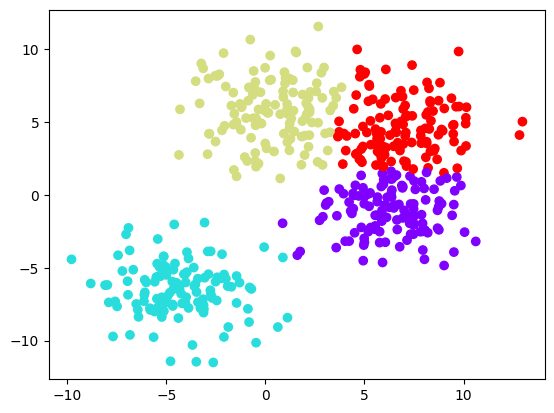

In [16]:
# Printing the data points
plt.scatter(features[:, 0], features[:, 1], c=km_model.labels_, cmap='rainbow')

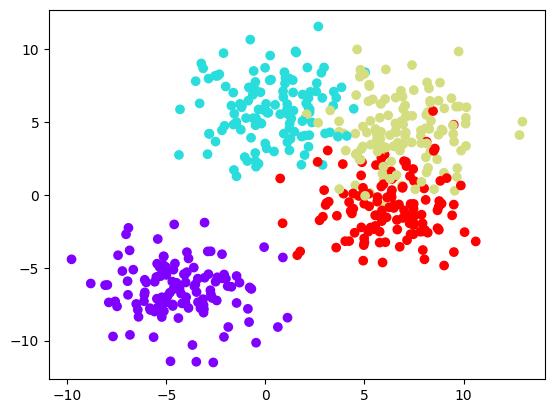

In [17]:
# Printing the actual data points
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='rainbow')

<h5>Customer Segmentation using K-Means Clustering</h5>

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
dataset = pd.read_csv('./data_sets/mall_customers.csv')
dataset.head(30)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
dataset.shape

(200, 5)

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_15472\4239183095.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['annual_income'], kde=False, bins=50)


<Axes: xlabel='annual_income'>

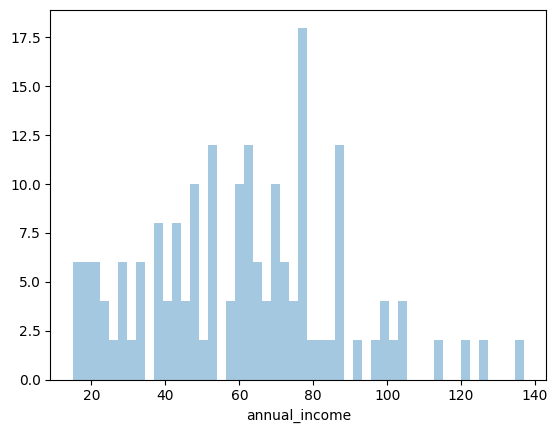

In [14]:
sns.distplot(dataset['annual_income'], kde=False, bins=50)

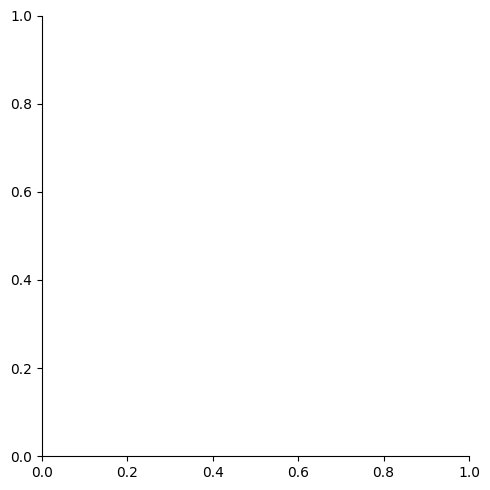

In [17]:
# Plotting the histogram for the spending score column in red color with 50 bins
sns.displot(dataset=['Spending Score (1-100)'], kde=False, bins=50, color='red')

<Axes: xlabel='annual_income', ylabel='spending_score'>

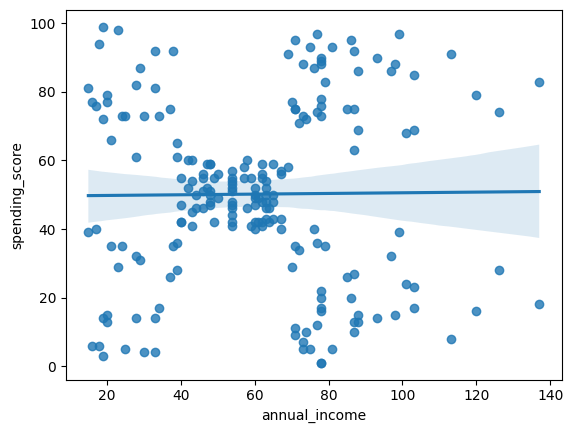

In [20]:
# Plotting regression plot for annual income against spending score
sns.regplot(x="annual_income", y="spending_score", data=dataset)

<Axes: xlabel='age', ylabel='spending_score'>

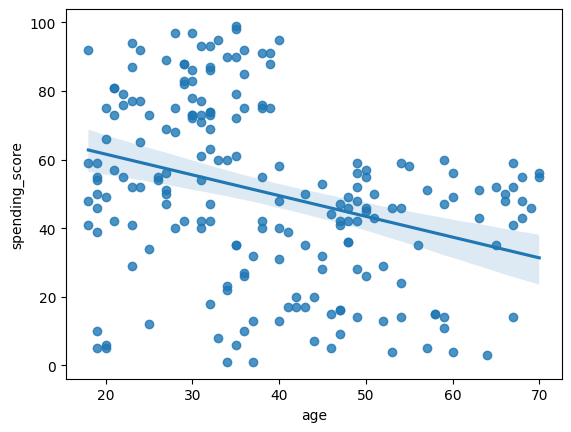

In [22]:
# Plotting regression plot for age against spending score
sns.regplot(x="age", y="spending_score", data=dataset)

In [23]:
# Filtering annual income and spending score columns and removing the remaining columns
dataset = dataset.filter(['annual_income', "spending_score"], axis=1)

# Printing some entries from the dataset
dataset.head(30)

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [24]:
# Performing kmeans clustering using kMeans class
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [25]:
# Printing the centroid values
print(km_model.cluster_centers_)

[[48.16831683 43.3960396 ]
 [25.72727273 79.36363636]
 [87.         18.63157895]
 [86.53846154 82.12820513]]


In [26]:
# Printing predicted label values
print(km_model.labels_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


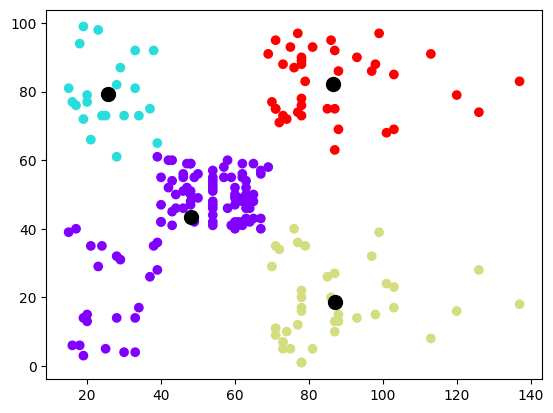

In [30]:
# Print the data points
plt.scatter(dataset.values[:, 0], dataset.values[:,1], c=km_model.labels_, cmap='rainbow')

# Print the centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')


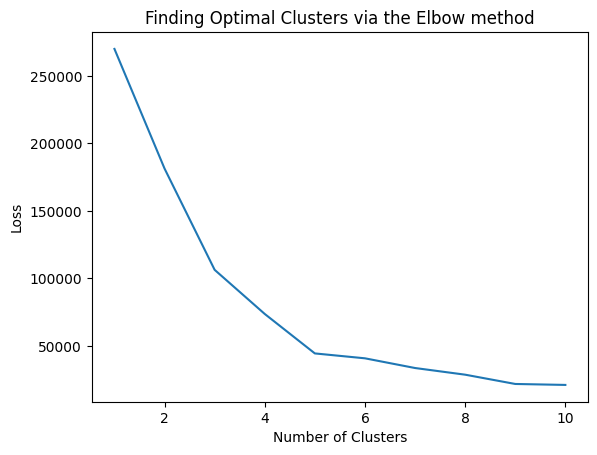

In [31]:
# Training KMeans on K values from 1 to 10
loss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)


# Printing loss against number of clusters

import matplotlib.pyplot as plt
plt.plot(range(1, 11), loss)
plt.title('Finding Optimal Clusters via the Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.show()

In [32]:
# Performing kmeans clustering using KMeans class
km_model = KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

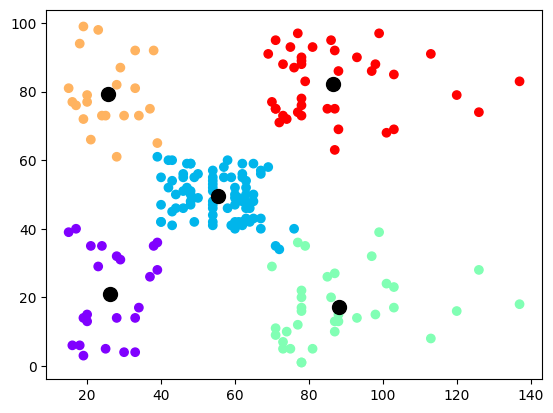

In [33]:
# Print the data points
plt.scatter(dataset.values[:,0], dataset.values[:,1], c=km_model.labels_, cmap="rainbow")

# Print the centroids
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c='black')

In [34]:
# Printing centroid values
print(km_model.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [35]:
cluster_map = cluster_map[cluster_map.cluster==1]
cluster_map.head(30)

NameError: name 'cluster_map' is not defined

<h4>Hierarchical Clustering</h4>

<h5>Clustering Dummy Data</h5>

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline

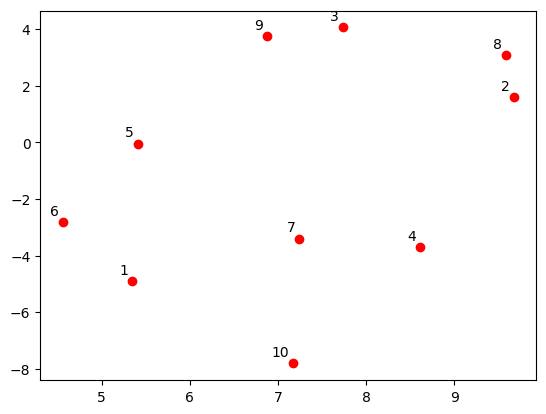

In [37]:
# Generating dummy data of 10 records with 2 clusters
features, labels = make_blobs(n_samples=10, centers=2, cluster_std=2.00)

# Plotting the dummy data
plt.scatter(features[:, 0], features[:, 1], color='r')

# Adding numbers to the data points
annots = range(1, 11)

for label, x, y in zip(annots, features[:, 0], features[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
    
plt.show()

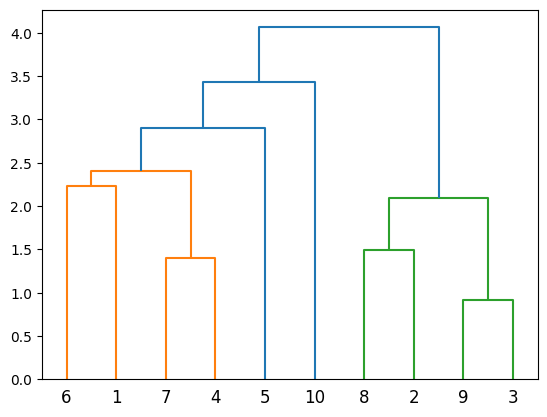

In [38]:
# Importing dendrogram and linkage classes with scipy
from scipy.cluster.hierarchy import dendrogram, linkage

# Creating an object of linkage class
dendos = linkage(features, 'single')

annots = range(1, 11)

# Creating dendrograms
dendrogram(
    dendos,
    orientation='top',
    labels=annots,
    distance_sort='descending',
    show_leaf_counts=True,
)

# Printing dendrograms
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering

# Training agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc_model.fit_predict(features)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

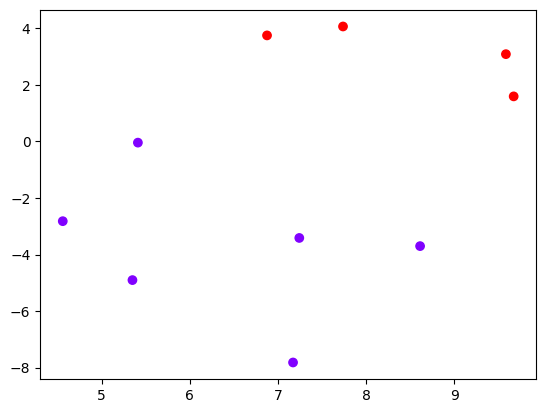

In [41]:
# Plotting the predicted clusters
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

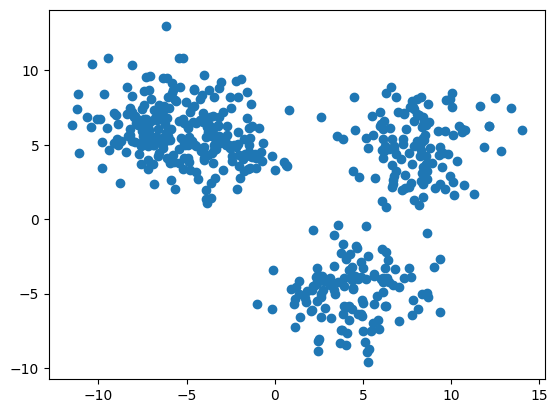

In [42]:
# Generating dummy data of 500 records with 4 clusters
features, labels = make_blobs(n_samples=500, centers=4, cluster_std=2.00)

# PLotting the dummy data
plt.scatter(features[:, 0], features[:, 1])

In [43]:
# Performing kmeans clustering using AgglomerativeClustering class
hc_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_model.fit_predict(features)

array([1, 1, 3, 2, 1, 2, 0, 3, 3, 2, 2, 0, 2, 3, 0, 0, 2, 0, 0, 0, 1, 3,
       2, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 3,
       0, 1, 0, 0, 2, 0, 3, 0, 2, 1, 3, 1, 0, 0, 0, 1, 1, 0, 1, 3, 1, 3,
       0, 3, 1, 0, 0, 0, 1, 0, 0, 2, 0, 3, 3, 1, 0, 2, 2, 2, 3, 3, 1, 0,
       3, 1, 1, 2, 3, 2, 2, 0, 0, 2, 2, 3, 2, 1, 1, 1, 2, 3, 3, 0, 1, 0,
       0, 0, 3, 0, 1, 0, 3, 1, 3, 3, 0, 2, 3, 3, 0, 0, 3, 1, 1, 0, 0, 0,
       3, 0, 1, 3, 3, 2, 1, 3, 1, 2, 2, 1, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0,
       3, 2, 1, 2, 1, 2, 0, 1, 3, 1, 0, 2, 0, 2, 3, 0, 3, 1, 3, 1, 1, 1,
       3, 2, 0, 0, 2, 0, 1, 3, 1, 1, 0, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 2,
       1, 0, 3, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0,
       1, 0, 2, 1, 1, 3, 0, 2, 2, 3, 1, 1, 1, 0, 3, 0, 2, 0, 0, 0, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 3, 3, 1, 2, 2, 1, 0, 2, 3, 3, 3, 3,
       1, 3, 0, 2, 1, 3, 1, 1, 0, 3, 0, 3, 1, 1, 1, 0, 3, 0, 0, 1, 2, 2,
       0, 0, 0, 2, 0, 3, 3, 0, 2, 2, 0, 1, 2, 1, 2,

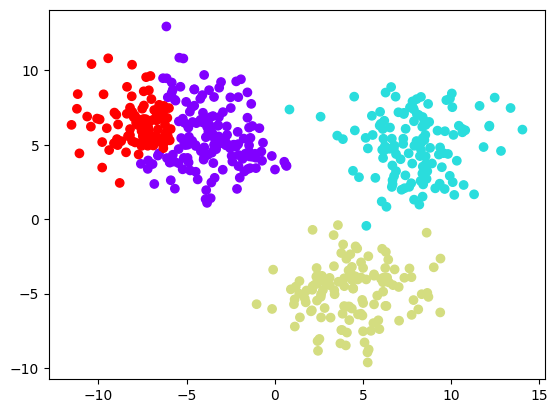

In [44]:
# Plotting the clustered data points
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

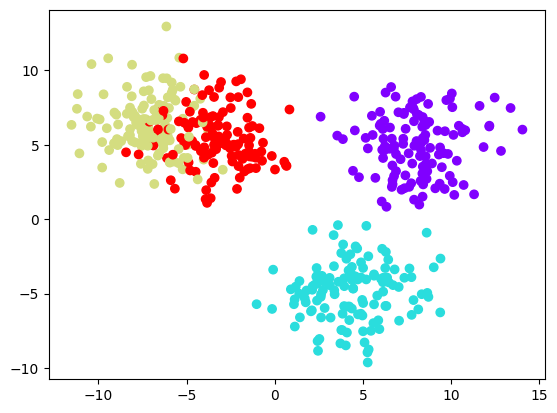

In [45]:
# Print the actual data points
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='rainbow')

<h5>Clustering the Iris Dataset</h5>

In [46]:
# Importing the iris dataset
import seaborn as sns

iris_df = sns.load_dataset('iris')
iris_df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [51]:
# Dividing data into features and labels
features = iris_df.drop('species', axis=1)
labels = iris_df.filter(['species'], axis = 1)
features.head(20)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [52]:
# Training hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering

# Training agglomerative clustering model
features = features.values
hc_model = AgglomerativeClustering(n_clusters=3 , linkage='ward')
hc_model.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

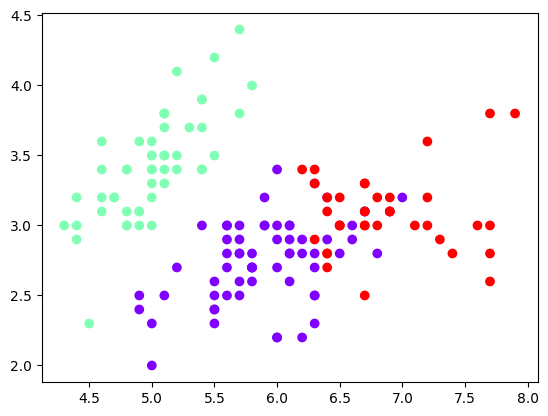

In [53]:
# The predicted customers
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

AttributeError: Text.set() got an unexpected keyword argument 'dend'

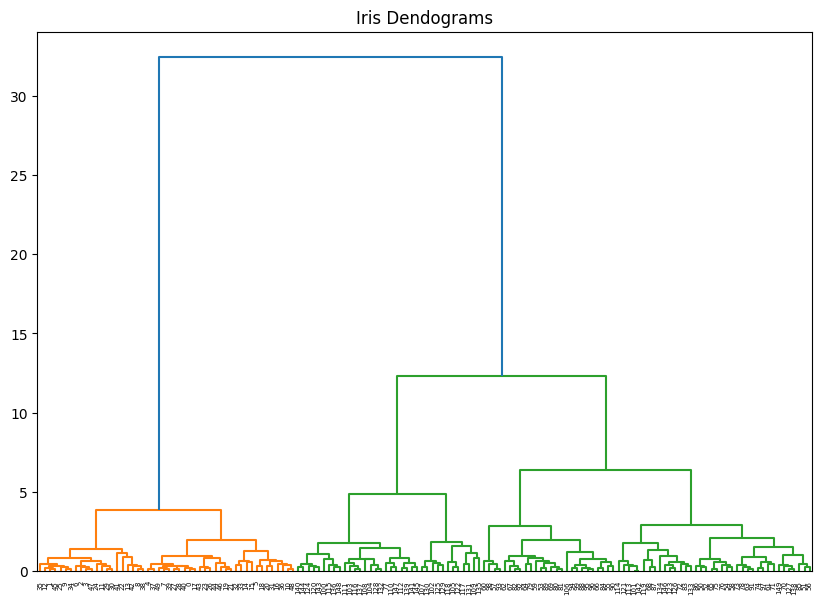

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms", dend = shc.dendrogram(shc.linkage(features, method='ward')))

<h3>Dimensionality Reduction with PCA and LDA using Scikit Learn</h3>

<h4>Principal Component Analysis</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_19208\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing the dataset
iris_df = sns.load_dataset('iris')

# Print the dataset header
iris_df.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
# Creating a features set
x = iris_df.drop(['species'], axis=1)

# Creating a labels set
y = iris_df['species']

# Converting labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [4]:
# Dividing data into 80 - 20% training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
# Applying scaling on training and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [6]:
# Importing PCA class
from sklearn.decomposition import PCA

# Creating object of the PCA class
pca = PCA()

# Training PCA model on training data
x_train = pca.fit_transform(x_train)

# Making predictions on test data
x_test = pca.transform(x_test)

In [7]:
# Printing variance ratios
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


In [8]:
# Use one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [9]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the Test set results
y_pred = lg.predict(x_test)

# Evaluating the results
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8666666666666667


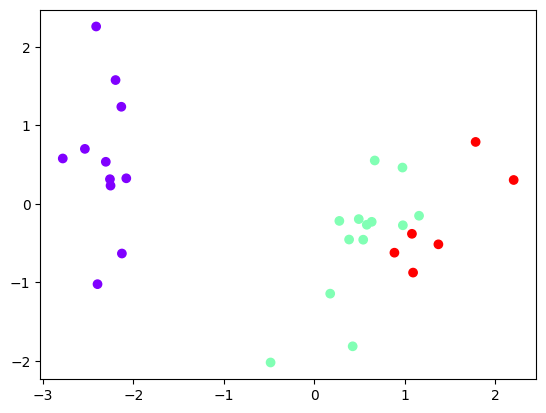

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

# Print the actual data points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='rainbow')

<h4>Linear Discriminant Analysis</h4>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_15788\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Importing the dataset
banknote_df = pd.read_csv('./data_sets/banknote.csv')

# Displaying the dataset head
banknote_df.head(20)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [5]:
# Dividing data into features and labels
x = banknote_df.drop(['class'], axis=1)
y = banknote_df.filter(['class'], axis=1)

In [6]:
# Dividing data into 80 - 20 training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
# Applying scaling on the training and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
# Importing the LDA class
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Creating object of the LDA class
lda = LDA()

# Training PCA model on training data
x_train = lda.fit_transform(x_train, y_train)

# Making predictions on test data
x_test = lda.transform(x_test)

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Printing variance ratios
variance_ratios = lda.explained_variance_ratio_
print(variance_ratios)

[1.]


In [10]:
# Creating an object of the LDA class
lda = LDA(n_components=1)

# Training PCA model on training data
x_train = lda.fit_transform(x_train, y_train)

# Making predictions on test data
x_test = lda.transform(x_test)

c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the Test set results
y_pred = lg.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9890909090909091


c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h4>Singular Value Decomposition</h4>

In [12]:
import pandas as pd
import numpy as np

# Importing the dataset
wine_data = pd.read_csv('./data_sets/winequality-red.csv', sep=";")

# Printing the dataset header
wine_data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
# Creating a feature set
x = wine_data.drop(['quality'], axis=1)

# Creating a label set
y =  wine_data['quality']

In [14]:
# Dividing data into 80 - 20 training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)

(1279, 11)
(1279,)


In [15]:
# Applying scaling on training and test data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the test set results
y_pred = lg.predict(x_test)

# Evaluating results
from sklearn import metrics
import numpy as np

print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.4375
Mean Squared Error 0.51875
Root Mean Squared Error 0.7202430145443967


In [17]:
# Importing TruncatedSVD class
from sklearn.decomposition import TruncatedSVD

# Creating object of the TruncatedSVD class
svd = TruncatedSVD()

# Training SVD model on the training data
x_train = svd.fit_transform(x_train)

# Making Predictions on the test data
x_test = svd.transform(x_test)

print(x_train.shape)
print(y_train.shape)

(1279, 2)
(1279,)


In [18]:
# Making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

# Training the logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

# Predicting the Test set results
y_pred = lg.predict(x_test)

# Evaluating results
from sklearn import metrics
import numpy as np

print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error 0.5
Mean Squared Error 0.6
Root Mean Squared Error 0.7745966692414834


<h3>Selecting Best Models with Scikit Learn</h3>

<h4>K-Fold Cross-Validation</h4>

<h5>Prediction Without Cross Validation</h5>

In [19]:
import pandas as pd
import numpy as np

# Importing the dataset
wine_data = pd.read_csv('./data_sets/winequality-red.csv', sep=';')

# Print the dataset header
wine_data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [20]:
# Extracting features
x = wine_data.drop(['quality'], axis=1)

# Extracting Labels
y = wine_data['quality']

In [21]:
# Dividing the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
# Feature scaling using the standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
# Importing the random forest algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

# Training the model
regressor = rf_reg.fit(x_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(x_test)

# Evaluating the model performance
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.40390625
Mean Squared Error: 0.3176339125
Root Mean Squared Error: 0.563590199080857


<h5>Prediction with Cross Validation</h5>

In [24]:
import pandas as pd
import numpy as np

# Importing the dataset
wine_data = pd.read_csv('./data_sets/winequality-red.csv', sep=";")

# Printing the dataset header
wine_data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [25]:
# Extracting features
x = wine_data.drop(['quality'], axis=1)

# Extracting Labels
y = wine_data['quality']

In [26]:
# Feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [27]:
# Importing the random forest algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

In [28]:
# Importing cross validation model from sklearn
from sklearn.model_selection import cross_val_score

# Applying cross validation with 5 folds
scores = cross_val_score(rf_reg, x, y, cv=5, scoring='neg_mean_squared_error')

print(scores)

[-0.38139295 -0.42745104 -0.43269904 -0.44007747 -0.43264961]


In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-0.42 accuracy with a standard deviation of 0.02


<h4>Hyperparameter Selection</h4>

In [30]:
import pandas as pd
import numpy as np

# Importing the dataset
wine_data = pd.read_csv('./data_sets/winequality-red.csv', sep=';')

# Printing the dataset header
wine_data.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [31]:
# Extracting features
x = wine_data.drop(['quality'], axis=1)

# Extracting labels
y = wine_data['quality']

In [32]:
# Defining the list of hyperparameters to be tested
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False],
    'criterion': ['mae']
}

In [34]:
# Importing the random forest regressor algorithm from sklearn
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)

In [35]:
# Importing the GridSearchCV class
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(
    estimator=rf_reg,
    param_grid=grid_param,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)

In [36]:
# Training the grid search
gd_sr.fit(x, y)

ValueError: 
All the 150 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'poisson', 'squared_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}. Got 'mae' instead.

--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'squared_error', 'poisson', 'friedman_mse'}. Got 'mae' instead.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'absolute_error', 'friedman_mse', 'squared_error', 'poisson'}. Got 'mae' instead.

--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\JohnWork\Documents\Projects\Python\scikit_learn_intro\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}. Got 'mae' instead.


<h4>Model Evaluation via Validation Curves</h4>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [38]:
# Importing the dataset
banknote_data = pd.read_csv('./data_sets/banknote.csv')

# Printing the dataset header
banknote_data.head(30)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [39]:
# Extracting features
x = banknote_data.drop(['class'], axis=1)

# Extracting Labels
y = banknote_data['class']

In [40]:
# Finding the train and test scores on 100 records
train_size, train_scores, test_scores = learning_curve(
    RandomForestClassifier(),
    x,
    y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.01, 1, 100),
    verbose=1
)

[learning_curve] Training set sizes: [  10   21   32   43   54   65   76   87   98  109  120  131  142  153
  164  175  186  197  208  219  230  241  252  263  274  285  296  307
  318  329  340  351  362  372  383  394  405  416  427  438  449  460
  471  482  493  504  515  526  537  548  559  570  581  592  603  614
  625  636  647  658  669  680  691  702  713  724  734  745  756  767
  778  789  800  811  822  833  844  855  866  877  888  899  910  921
  932  943  954  965  976  987  998 1009 1020 1031 1042 1053 1064 1075
 1086 1097]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   45.6s finished


In [41]:
# Finding the mean training scores
train_mean = np.mean(train_scores, axis=1)
print(train_mean)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [42]:
# Finding the mean testing scores
test_mean = np.mean(test_scores, axis = 1)
print(test_mean)

[0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217 0.55539217
 0.55539217 0.62244725 0.77990179 0.86590843 0.93440212 0.9635647
 0.96938553 0.96720106 0.96865826 0.97084804 0.97448706 0.97448441
 0.97813139 0.98031586 0.97813139 0.98762309 0.99198673 0.9897996
 0.99052953 0.99052953 0.98980226 0.99271666 0.992714   0.99417386
 0.99198673 0.99125946 0.99344127 0.9897996  0.99198673 0.99344393
 0.992714   0.99344127 0.992714   0.99198673 0.99344393 0.992714

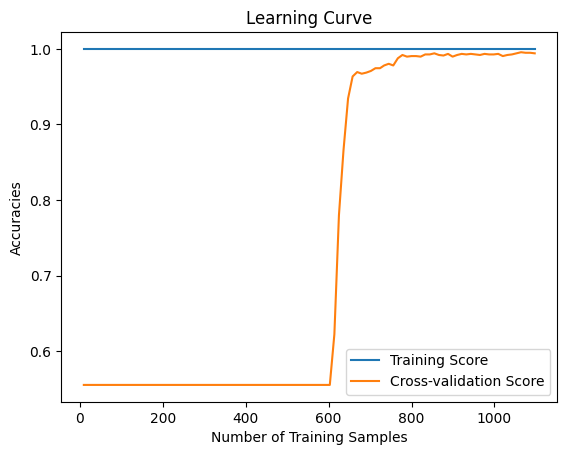

In [43]:
# Plotting learning curves
plt.plot(train_size, train_mean, label="Training Score")
plt.plot(train_size, test_mean, label="Cross-validation Score")

plt.title("Learning Curve")
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracies')
plt.legend(loc="best")

<h4>Saving Models for Future Use</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_7892\1243970915.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing the dataset
banknote_data = pd.read_csv('./data_sets/banknote.csv')

# Printing the banknote dataset header
banknote_data.head(30)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [3]:
# Extracting features
x = banknote_data.drop(['class'], axis=1)

# Extracting labels
y = banknote_data['class']

In [4]:
# Dividing data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
# Feature scaling using standard scalar
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [6]:
# Importing the random forest algorithm from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

In [7]:
# Training the model
classifier = rf_clf.fit(x_train, y_train)

In [8]:
# Saving the model using pickle
import pickle

file_name = "./data_sets/banknote_model.sav"

pickle.dump(classifier, open(file_name, 'wb'))

In [9]:
# Loading the model using pickle
loaded_classifier = pickle.load(open(file_name, 'rb'))

y_pred = loaded_classifier.predict(x_test)

In [10]:
# Evaluating the algorithm on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  2 116]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


<h3>Natural Language Processing with Scikit Learn</h3>

In [11]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [12]:
# Reading the CSV data set
message_dataset = pd.read_csv('./data_sets/emails.csv', engine='python')

# Printing the dataset header
message_dataset.head(50)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [13]:
message_dataset.shape

(5728, 2)

<h5>Data Visualization</h5>

<Axes: ylabel='count'>

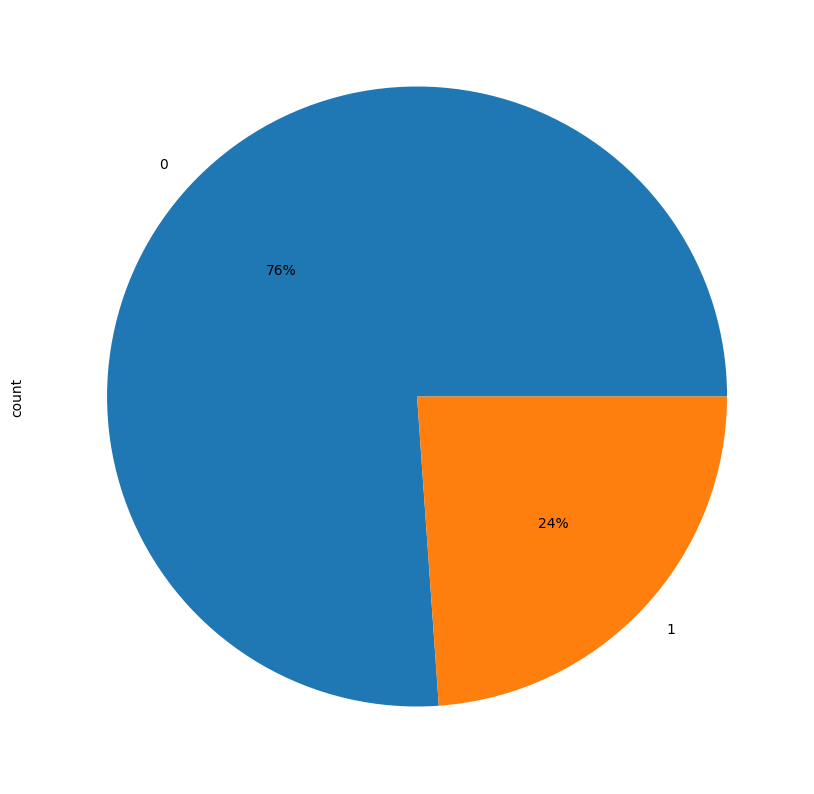

In [15]:
# Increasing default figure size
plt.rcParams['figure.figsize'] = [10, 12.5]

# PLotting a pie plot for spam and ham email messages
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [17]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JohnWork\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# Importing english stop words
from nltk.corpus import stopwords

stop = stopwords.words('english')


# Removing stopwords from email messages
message_dataset['text_without_sw'] = message_dataset['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

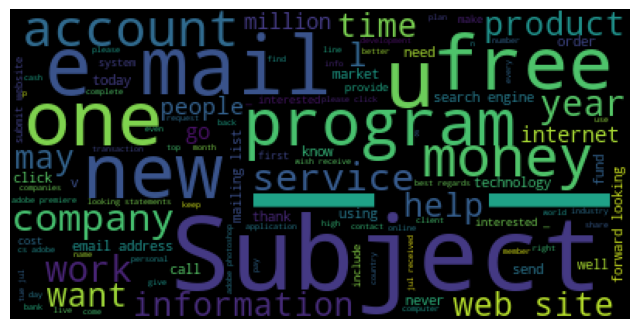

In [19]:
# Filtering spam messages
message_dataset_spam = message_dataset[message_dataset['spam'] == 1]

# Increase the figure size
plt.rcParams['figure.figsize'] = [8, 10]

# Joining words in the dataset containing spam messages
text = ' '.join(message_dataset_spam['text_without_sw'])

# Generating word cloud using spam messages
wordcloud2 = WordCloud().generate(text)

# Plotting word cloud
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

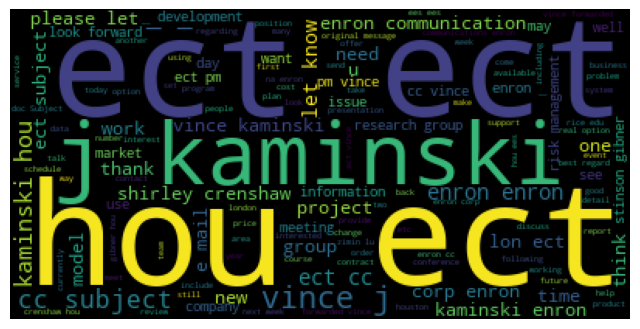

In [20]:
# Filtering non-spam messages
message_dataset_ham = message_dataset[message_dataset['spam'] == 0]

# Increase figure size
plt.rcParams['figure.figsize'] = [8, 10]

# Joining words in the dataset containing non-spam messages
text = ' '.join(message_dataset_ham['text_without_sw'])

# Generating word cloud using non-spam messages
wordcloud2 = WordCloud().generate(text)

# Plotting word cloud
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

<h5>Cleaning the Data</h5>

In [21]:
# Creating feature set
x = message_dataset['text']

# Creating the label set
y = message_dataset['spam']

In [22]:
# Cleaning feature set (email messages)
def clean_text(doc):
    # Removing everything except capital and small letters
    document = re.sub('[a-zA-Z]', ' ', doc)

    # Removing single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Removing multiple spaces
    document = re.sub(r'\s+', ' ', document)
    
    return document

In [23]:
x_sentences = []

# Creating a list of sentences
reviews = list(x)

# Cleaning all sentences using clean_text() function
for rev in reviews:
    x_sentences.append(clean_text(rev))

<h5>Convert Text to Numbers</h5>

In [24]:
# Importing stopwords and TFIDF vectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting email messages to text va TFIDF vectorizer
vectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

x = vectorizer.fit_transform(x_sentences).toarray()

<h5>Training the Model</h5>

In [25]:
# Dividing the data into the training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# Training Naive Bayes algorithm on training data
spam_detector = MultinomialNB()

spam_detector.fit(x_train, y_train)

MultinomialNB()

In [27]:
y_pred = spam_detector.predict(x_test)

In [28]:
# Evaluating a model's performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[831  25]
 [148 142]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       856
           1       0.85      0.49      0.62       290

    accuracy                           0.85      1146
   macro avg       0.85      0.73      0.76      1146
weighted avg       0.85      0.85      0.83      1146

0.8490401396160558


<h5>Making Predictions on a single instance</h5>

In [29]:
# Printing sentence at index 56 in the dataset
print(x_sentences[56])

# Print label for the sentence at index 56
print(y[56])

 : , . , ( , , , , ) . ! 2 - 3 ! : - 2005 - $ 29 . 95 - 2 - $ 59 . 95 - 12 - $ 49 . 95 - 2004 ( 5 . 5 ) - $ 39 . 95 - 2004 - $ 119 . 95 ! , 
1


In [30]:
# Making prediction for the label for the sentence at index 56
print(spam_detector.predict(vectorizer.transform([x_sentences[56]])))

[1]
